## PHASE 3 PROJECT
##### Student name: James Ngumo
##### Student pace: Hybrid/full time
##### Instructor name: Maryann Mwikali

### Introduction
##### One big challenge of the telecommunications sector is customer churn when customers decide to discontinue their services due to dissatisfaction or unfulfilled needs. For SyriaTel, where churn occurs mostly due to demographic factors, usage patterns, service interaction, and even payment history, it is thus important to understand these so as to formulate methodologies of improving customer satisfaction and retention. By identifying key indicators of churn, SyriaTel will have the necessary information to take the needed measures to resolve the problems before they cause loss of customers.

### Business Problem.
##### SyriaTel can enhance its customer retention efforts by identifying key behavior indicators that signal susceptibility to churn, such as usage patterns, customer service interactions, payment history, and demographic information. Just as early intervention is crucial in healthcare, timely identification of at-risk customers enables SyriaTel to implement targeted retention strategies, improving customer satisfaction and loyalty. By leveraging predictive analytics, the company can reduce customer attrition, protect revenue streams, and make informed decisions about resource allocation, ultimately fostering a more stable customer base


### Business Understanding
##### The objective is to build a classifier that predicts whether a customer will soon stop doing business with SyriaTel, addressing the critical issue of customer churn in the telecommunications industry. By analyzing customer demographics, usage patterns, service interactions, payment history, and contract details, SyriaTel aims to identify key indicators of churn. This predictive model will enable the company to proactively engage at-risk customers with targeted retention strategies, ultimately reducing financial losses and enhancing customer satisfaction and loyalty. Leveraging these insights will support SyriaTel in maintaining a stable revenue stream and fostering sustainable growth in a competitive market.

### Data Understanding 
##### The dataset used in this project is sourced from here: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset
##### The data for predicting customer churn at SyriaTel encompasses a broad array of attributes: demographic, usage pattern, service interaction, payment history, and contract. It's important to understand the completeness, consistency, and relevance of this data to bring out the patterns that relate to churn risk. It analyzes these factors to come up with a predictive model for SyriaTel that will highlight the at-risk customers accurately for the purpose of retention strategies and improvement of customer satisfaction and loyalty.


In [23]:
# Check dataset size
import pandas as pd

df = pd.read_csv("bigml.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


It contains 3333 rows and 9 columns. The 21 columns are:

In [24]:
# Identifying columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [25]:
# check the shape of the dataset
df.shape

(3333, 21)

In [26]:
# Basic description of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


##### The dataset has 3333 rows and 21 columns with the target column being churn.

In [27]:
# a basic summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Data Analysis and Data Preparation
Before performing exploratory analysis and modelling on the data certain issues such as missing values and duplicates have to be handled first.

In [28]:
# importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8), 'axes.facecolor':'#E4F5FF', 'figure.facecolor':'cornflowerblue'});
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore') 

In [29]:
# check for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not have missing values. Let's check for possible duplicates next.

In [30]:
# check for duplicates
df.duplicated().sum()

0

In [31]:
# drop irelevant columns
df=df.drop(['phone number','state','area code'], axis=1)

In [32]:
# check for missing values
df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

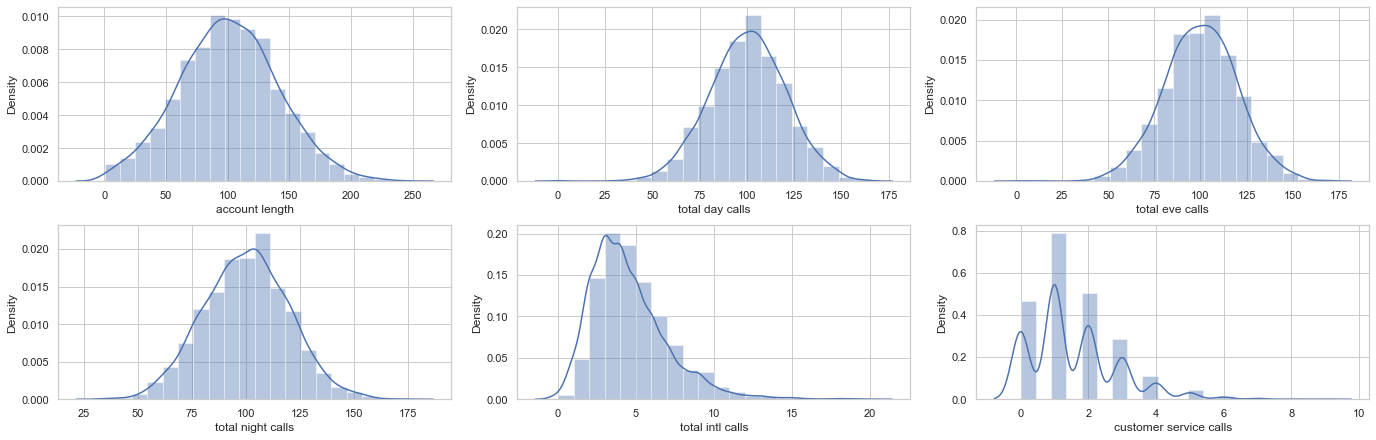

In [33]:
#  Distrubution Plots for Numeric Features
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

There are no missing values

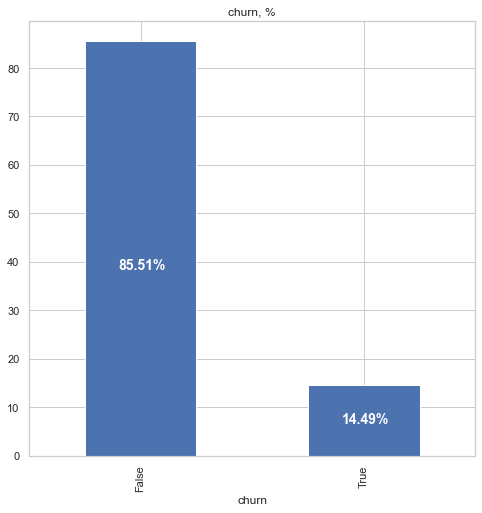

In [34]:
# check for the distribution of churn
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.3 * width, p.get_y()+ 0.45 * height), color = 'white', weight = 'bold', size = 14)

The dataset is unbalanced with only 14.49% of objects belonging to class 1

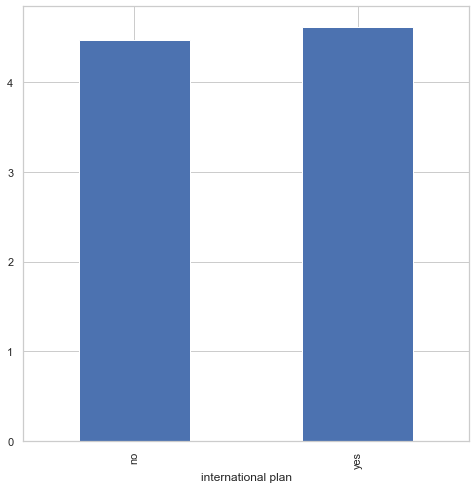

In [35]:
# check for relation between internationalplan and international calls
df.groupby('international plan')['total intl calls'].mean().plot(kind='bar')
plt.show()

Having an international plan does not necessarily mean you make international calss.But most of the internetional plan users make international calls

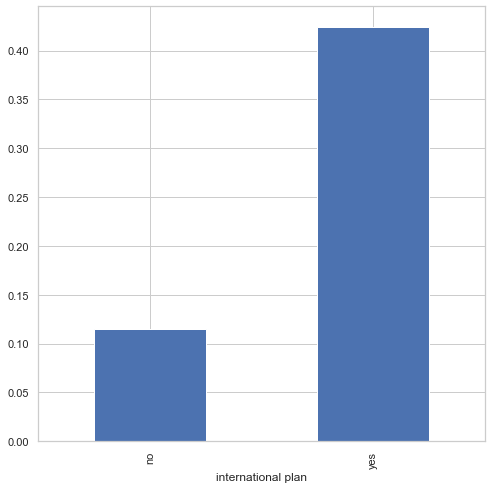

In [36]:
# check how how international plan relates to churn
df.groupby('international plan')['churn'].mean().plot(kind='bar')
plt.show()

The data suggests that customers who have an international plan are more likely to churn compared to those who do not

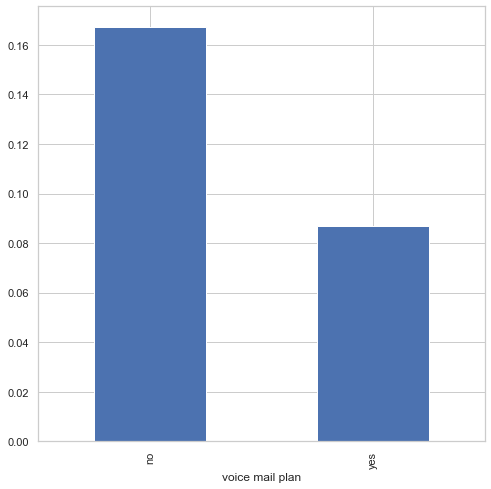

In [37]:
# check how do having voicemail and an international plan relate to subscriber loyalty
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar')
plt.show()

The data suggests that customers who have a voice mail plan are less likely to churn compared to those who do not.

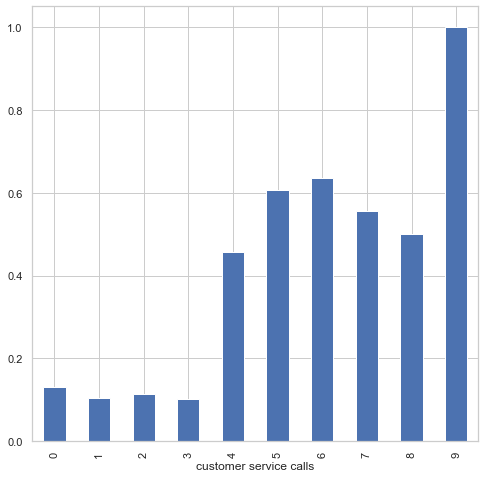

In [38]:
# How the number of customer service calls affects churn
df.groupby('customer service calls')['churn'].mean().plot(kind='bar')
plt.show()

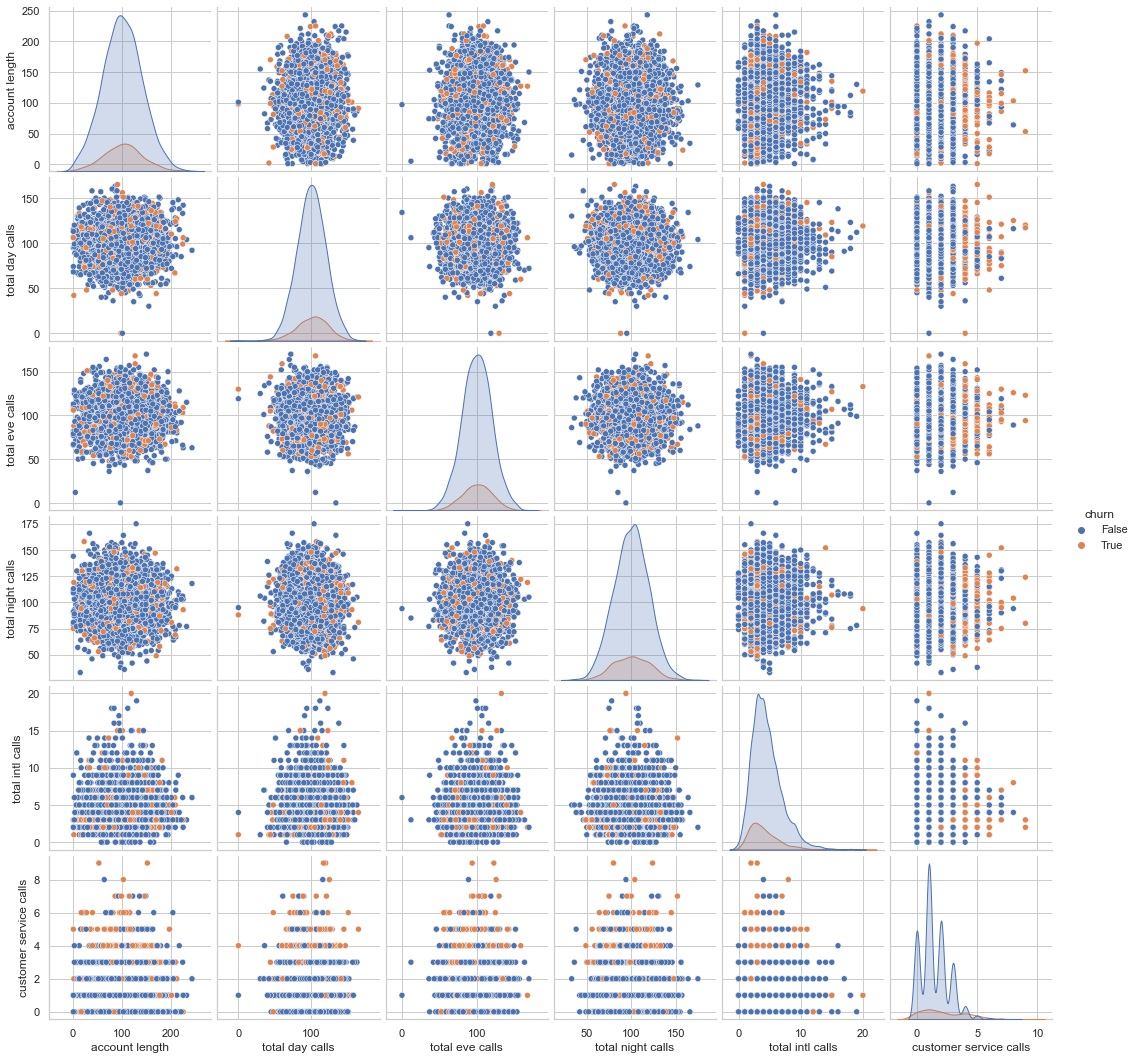

In [39]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

There seems to be a evident relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service

In [43]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['international plan','voice mail plan']

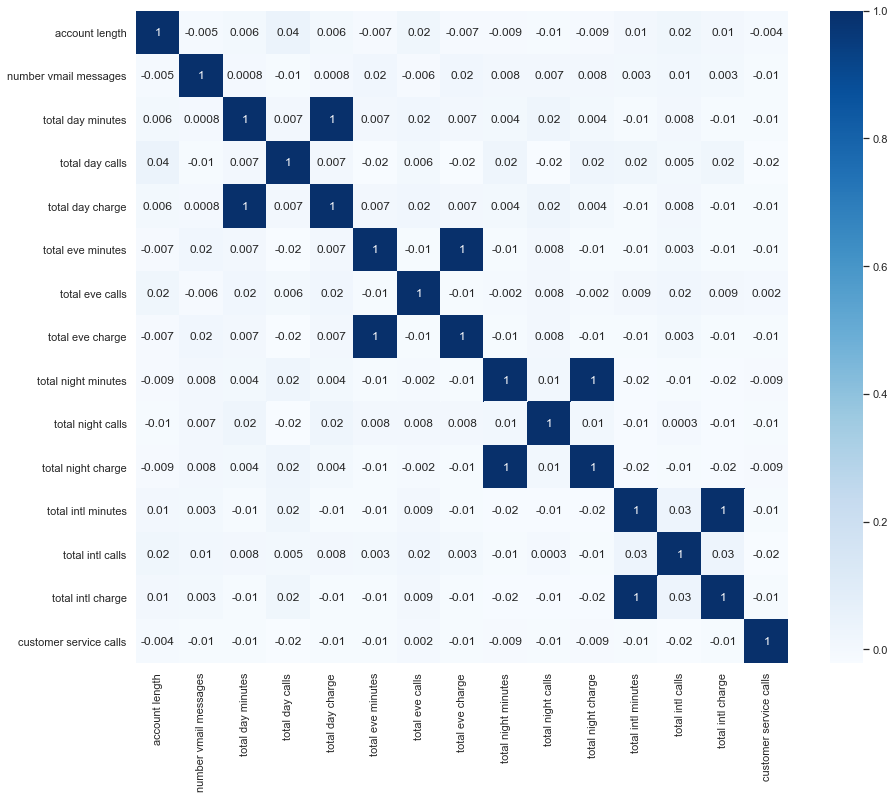

In [41]:
#Correlation Heatmap for Numeric Features
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the features are not correlated however some do share a perfect correlation.

-Total day charge and total day minutes features are fully positively correlated.

-Total eve charge and total eve minutes features are fully positively correlated.

-Total night charge and total night minutes features are fully positively correlated.

-Total int charge and total int minutes features are fully positively correlated.

It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

Categorical Features Analysis

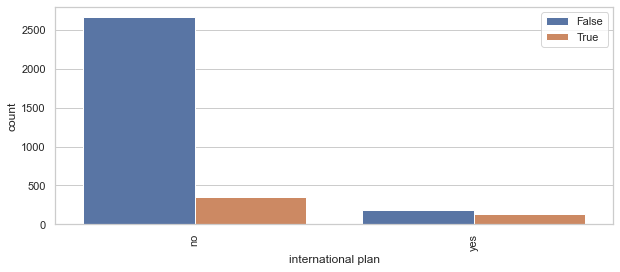

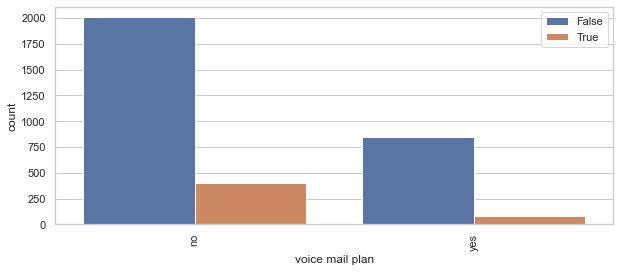

In [44]:
#Categorical Features Analysis
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

In [45]:
# Mapping categorical string values to numerical values.
df['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df['churn'] = df['churn'].map({True:1, False:0})

# Model

In [ ]:
X = df[['total day minutes', 'total day charge', 'international plan', 'customer service calls']]
y = df['churn']

In [ ]:
np.isnan(df).sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
# standardize the features in the dataset X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)


In [ ]:
#split a dataset into training and validation (or testing) sets.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.25, random_state=22)

In [ ]:
import numpy as np

# Check for NaN values
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_valid:", np.isnan(X_valid).sum())

# Check for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_valid:", np.isinf(X_valid).sum()

NaN values in X_train: 0
NaN values in X_valid: 0
Infinite values in X_train: 0
Infinite values in X_valid: 0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_valid))

0.8657074340527577


In [ ]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64